In [1]:
# PHÁT BIỂU BÀI TOÁN
# Bài toán phân loại tin nhắn SMS thành hai loại: spam (tin rác) và ham (tin bình thường)
# Mục tiêu: Xây dựng mô hình học máy để tự động phát hiện tin nhắn SMS spam
# Dữ liệu: Bộ dữ liệu SMS Spam Collection v.1 với 5,574 tin nhắn tiếng Anh đã được gán nhãn ham hoặc spam

In [2]:
# NHẬP THƯ VIỆN VÀ TẢI DỮ LIỆU
import numpy as np  # Thư viện tính toán số học
import pandas as pd  # Thư viện xử lý dữ liệu dạng bảng

In [3]:
# Kiểm tra dữ liệu
message = [line.rstrip() for line in open("SMSSpamCollection.csv")]
print(len(message))

for message_no, message in enumerate(message[:10]):
    print(message_no, message)
    print('\n')

5574
0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Clai

In [4]:
# Tải dữ liệu vào DataFrame pandas để dễ dàng xử lý
message = pd.read_csv("SMSSpamCollection.csv", sep='\t', names=["labels", "message"])
message.head()


,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# PHÂN TÍCH KHÁM PHÁ DỮ LIỆU
message.describe()  # Thống kê mô tả về dữ liệu

message.groupby('labels').describe()  # Thống kê theo nhóm nhãn (spam/ham)


message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [6]:
# Thêm cột độ dài tin nhắn
message['length'] = message['message'].apply(len)
message.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

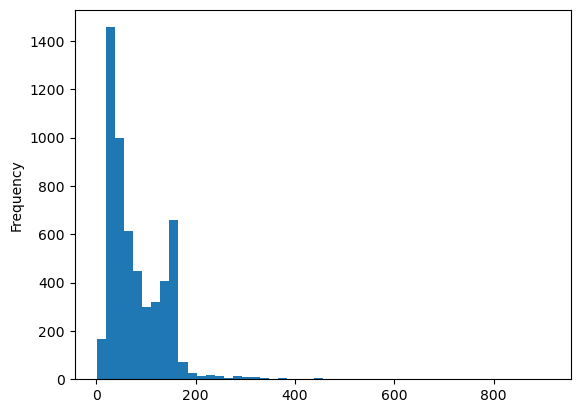

In [7]:
# TRỰC QUAN HÓA DỮ LIỆU
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Vẽ biểu đồ phân phối độ dài tin nhắn
message['length'].plot(bins=50, kind='hist')

# Thống kê mô tả về độ dài tin nhắn
message.length.describe()

# Kiểm tra tin nhắn dài nhất
message[message['length'] == 910]['message'].iloc[0]

In [8]:
# TIỀN XỬ LÝ VĂN BẢN
import string
mess = 'sample message!...'
# Loại bỏ dấu câu
nopunc = [char for char in mess if char not in string.punctuation]
nopunc = ''.join(nopunc)
print(nopunc)

sample message


In [10]:
# Loại bỏ stopwords (các từ phổ biến không mang nhiều ý nghĩa)
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')[0:10]  # Hiển thị 10 stopwords đầu tiên

nopunc.split()  # Tách văn bản thành các từ

# Loại bỏ stopwords từ văn bản
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
clean_mess

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tungi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['sample', 'message']

In [11]:
# Tạo hàm tiền xử lý văn bản cho toàn bộ dữ liệu
def text_process(mess):
    # Loại bỏ dấu câu
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    # Loại bỏ stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [12]:
# Dữ liệu gốc
message.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
# Áp dụng tiền xử lý cho các tin nhắn
message['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [14]:
# TRÍCH XUẤT ĐẶC TRƯNG
# Chuyển đổi văn bản thành biểu diễn số học (Bag-of-Words)
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
# Tạo Bag-of-Words cho tất cả tin nhắn
bow_transformer = CountVectorizer(analyzer=text_process).fit(message['message'])
print(len(bow_transformer.vocabulary_))  # Kích thước từ điển

11425


In [16]:
# Kiểm tra quá trình chuyển đổi trên một ví dụ cụ thể
message4 = message['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [17]:
# Biểu diễn vector cho tin nhắn thứ 4
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [19]:

# Biểu diễn Bag-of-Words cho toàn bộ dữ liệu
messages_bow = bow_transformer.transform(message['message'])


In [20]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of non-zero occurrences:', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of non-zero occurrences: 50548


In [22]:
# Tính độ thưa của ma trận (% phần tử khác 0)
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print(sparsity)
print('sparsity:{}'.format(round(sparsity)))

0.07940295412668218
sparsity:0


In [23]:
# ÁP DỤNG TF-IDF
# Đặt trọng số các từ và chuẩn hóa vector
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

# Kiểm tra IDF của một số từ
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

# Biến đổi TF-IDF cho toàn bộ dữ liệu
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067
3.2800524267409408
8.527076498901426
(5572, 11425)


In [24]:

# HUẤN LUYỆN MÔ HÌNH NAIVE BAYES
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, message['labels'])

# Dự đoán cho một mẫu đơn lẻ
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', message.labels[3])

predicted: ham
expected: ham


In [25]:

# ĐÁNH GIÁ MÔ HÌNH
# Dự đoán trên toàn bộ dữ liệu gốc (chưa chia tập huấn luyện/kiểm tra)
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(message['labels'], all_predictions))
print(confusion_matrix(message['labels'], all_predictions))


['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572

[[4825    0]
 [ 115  632]]


In [26]:
# CHIA DỮ LIỆU VÀ HUẤN LUYỆN LẠI
# Chia dữ liệu thành tập huấn luyện (80%) và kiểm tra (20%)
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(
    message['message'], message['labels'], test_size=0.2)

print(len(msg_train), len(msg_test), len(label_train), len(label_test))

4457 1115 4457 1115
